In [1]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('Activity Logs/ParticipantStatusLogs1.csv')

# 提取timestamp，participantId和jobId列
df = df[['timestamp', 'participantId', 'jobId']]

# 显示前5行数据
print(df.head())

              timestamp  participantId  jobId
0  2022-03-01T00:00:00Z              0    254
1  2022-03-01T00:00:00Z              1    929
2  2022-03-01T00:00:00Z              2    348
3  2022-03-01T00:00:00Z              3    316
4  2022-03-01T00:00:00Z              4    177


In [2]:
# 计算participantId中每个值出现的次数
print(df['participantId'].value_counts())

participantId
0      1667
129    1667
119    1667
120    1667
121    1667
       ... 
634    1152
907    1152
794    1152
901    1152
567    1152
Name: count, Length: 1011, dtype: int64


In [3]:
# 计算jobId中每个值出现的次数
print(df['jobId'].value_counts())

jobId
337     7072
975     6272
1220    5452
572     3918
731     2716
        ... 
378        1
380        1
589        1
525        1
792        1
Name: count, Length: 1190, dtype: int64


In [ ]:
# 读取'Activity Logs/ParticipantStatusLogs1.csv'到'Activity Logs/ParticipantStatusLogs11.csv'这11个文件到一个DataFrame中,代表3.1到5.2的数据
df_1 = pd.concat([pd.read_csv('Activity Logs/ParticipantStatusLogs' + str(i) + '.csv') for i in range(1, 12)])
# 提取timestamp，participantId和jobId列
df_1 = df_1[['timestamp', 'participantId', 'jobId']]
# 显示前5行数据

In [5]:
print(df_1.head())

              timestamp  participantId  jobId
0  2022-03-01T00:00:00Z              0  254.0
1  2022-03-01T00:00:00Z              1  929.0
2  2022-03-01T00:00:00Z              2  348.0
3  2022-03-01T00:00:00Z              3  316.0
4  2022-03-01T00:00:00Z              4  177.0


In [6]:
# 统计jobId的分布
print(df_1['jobId'].value_counts())

jobId
1309.0    19676
368.0     19676
670.0     19676
566.0     19676
931.0     19676
          ...  
219.0         1
209.0         1
592.0         1
515.0         1
792.0         1
Name: count, Length: 1190, dtype: int64


In [8]:
# 查看jobId中的缺失值
print(df_1['jobId'].isnull().sum())

1


In [9]:
# 删除jobId中的缺失值所在的行
df_1 = df_1.dropna(subset=['jobId'])

In [10]:
# 查看participantId中的缺失值
print(df_1['participantId'].isnull().sum())

0


In [11]:
# 转换jobId的数据类型为整数
df_1['jobId'] = df_1['jobId'].astype(int)

In [12]:
# 转换timestamp的数据类型为日期
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

In [13]:
print(df_1.head())

                  timestamp  participantId  jobId
0 2022-03-01 00:00:00+00:00              0    254
1 2022-03-01 00:00:00+00:00              1    929
2 2022-03-01 00:00:00+00:00              2    348
3 2022-03-01 00:00:00+00:00              3    316
4 2022-03-01 00:00:00+00:00              4    177


In [15]:
# 保存df_1
df_1.to_csv('EmploymentLogs_3-1_5-2.csv', index=False)

In [16]:
import pandas as pd

# 定义文件名的列表
filenames = [f'Activity Logs/ParticipantStatusLogs{i}.csv' for i in range(1, 73)]

# 读取所有文件并将它们合并到一个DataFrame中
df = pd.concat([pd.read_csv(f, usecols=['timestamp', 'participantId', 'jobId']) for f in filenames])

# 显示前5行数据
print(df.head())

              timestamp  participantId  jobId
0  2022-03-01T00:00:00Z            0.0  254.0
1  2022-03-01T00:00:00Z            1.0  929.0
2  2022-03-01T00:00:00Z            2.0  348.0
3  2022-03-01T00:00:00Z            3.0  316.0
4  2022-03-01T00:00:00Z            4.0  177.0


In [17]:
# 改变jobId的数据类型为整数，如果有缺失值则用-1填充，转换timestamp的数据类型为日期，转换participantId的数据类型为整数
df['jobId'] = df['jobId'].fillna(-1).astype(int)
df['timestamp'] = pd.to_datetime(df['timestamp'])


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
# 分析participantId的分布
print(df['participantId'].value_counts())


participantId
347.0    129279
370.0    129279
357.0    129279
359.0    129279
360.0    129279
          ...  
853.0      1152
855.0      1152
761.0      1152
602.0      1152
567.0      1152
Name: count, Length: 1011, dtype: int64


In [19]:
# 分析participantId的缺失值
print(df['participantId'].isnull().sum())

1


In [20]:
# 删除participantId的缺失值所在的行
df = df.dropna(subset=['participantId'])

In [21]:
df['participantId'] = df['participantId'].astype(int)

In [23]:
# 将日期时间转换为月份
df['month'] = df['timestamp'].dt.to_period('M')

# 按月份分割数据
monthly_dfs = {month: group for month, group in df.groupby('month')}

C:\Users\19601\AppData\Local\Temp\ipykernel_11076\1918435100.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M')


In [24]:
# 按月份分组，然后列出每组中的所有 jobId
job_ids = df.groupby('month')['jobId'].apply(list).reset_index(name='jobIds')

# 显示前5行数据
print(job_ids.head())

     month                                             jobIds
0  2022-03  [254, 929, 348, 316, 177, 33, 89, 270, 20, 21,...
1  2022-04  [254, 929, 348, 316, 177, 33, 89, 270, 20, 21,...
2  2022-05  [254, 929, 348, 316, 177, 33, 89, 270, 20, 21,...
3  2022-06  [254, 929, 348, 316, 177, 33, 89, 270, 20, 21,...
4  2022-07  [254, 929, 348, 316, 177, 33, 89, 270, 20, 21,...


In [25]:
# 将 jobId 列中的列表展开为多行
exploded_df = job_ids.explode('jobIds')

# 将结果输出为 CSV 文件
exploded_df.to_csv('monthly_job_ids.csv', index=False)

In [26]:
# 读取'Attributes/Jobs.csv'文件
df2 = pd.read_csv('Attributes/Jobs.csv')

# 根据df2建立一个字典，key为df2[jobId]，value为df2[employerId]
job_employer_dict = dict(zip(df2['jobId'], df2['employerId']))

     month jobIds  employerId
0  2022-03    254       424.0
0  2022-03    929      1321.0
0  2022-03    348       440.0
0  2022-03    316       436.0
0  2022-03    177       411.0


In [ ]:
# 根据job_employer_dict, 将jobId转换为employerId
exploded_df['employerId'] = exploded_df['jobIds'].map(job_employer_dict)

In [29]:
# 删除employerId中的缺失值所在的行
exploded_df = exploded_df.dropna(subset=['employerId'])



In [30]:
# 将employerId列作为int
exploded_df['employerId'] = exploded_df['employerId'].astype(int)

print(exploded_df.head())

     month jobIds  employerId
0  2022-03    254         424
0  2022-03    929        1321
0  2022-03    348         440
0  2022-03    316         436
0  2022-03    177         411


In [34]:
# 统计三月份的jobId的分布
print(exploded_df[exploded_df['month'] == '2022-03']['jobIds'].value_counts())

jobIds
521    8840
724    8840
520    8840
679    8840
645    8840
       ... 
378       1
380       1
589       1
525       1
792       1
Name: count, Length: 1190, dtype: int64


In [35]:
# 统计三月份employerId的分布，保留dataframe格式, 留下month列和employerId列
employerId_3 = exploded_df[exploded_df['month'] == '2022-03'][['month', 'employerId']]
print(employerId_3['employerId'].value_counts())

employerId
1771    70937
877     70718
1786    70716
883     70713
876     62897
        ...  
875      8841
379      8839
835       628
832       223
858       105
Name: count, Length: 252, dtype: int64


In [36]:
# 将22三月份的结果输出为 CSV 文件
exploded_df[exploded_df['month'] == '2022-03'].to_csv('employer_2022-03.csv', index=False)

In [ ]:
# 统计每个月份的总计行数
monthly_counts = df['month'].value_counts().reset_index()


In [41]:
print(monthly_counts)

      month    count
0   2022-03  7937441
1   2022-05  7856640
2   2022-07  7856640
3   2022-08  7856640
4   2022-10  7856640
5   2022-12  7856640
6   2023-01  7856640
7   2023-03  7856640
8   2022-04  7603200
9   2022-06  7603200
10  2022-09  7603200
11  2022-11  7603200
12  2023-04  7603200
13  2023-02  7096319
14  2023-05  5877494


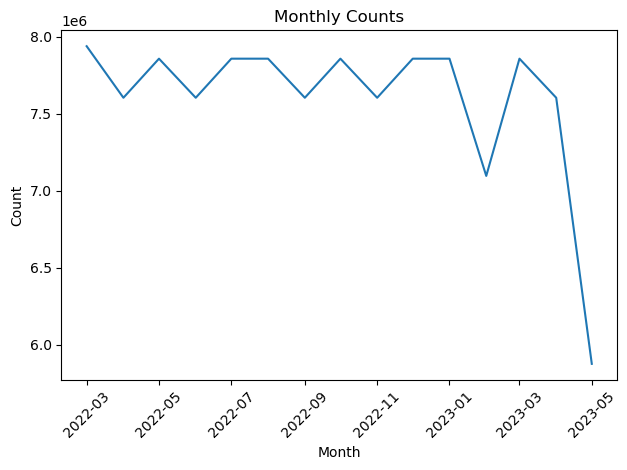

In [55]:
# 先把month转化为日期类型以进行排序
new_df = monthly_counts.copy()
new_df['month'] = (new_df['month']).dt.to_timestamp()

# 排序
new_df = new_df.sort_values(by='month')

new_df.to_csv('monthly_counts.csv', index=False, header=['month', 'count'])

import matplotlib.pyplot as plt
# 绘制折线图
plt.plot(new_df['month'], new_df['count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# 统计每个月份不同的emplyerId的数量
employer_counts = exploded_df.groupby('month')['employerId'].nunique().reset_index(name='employer_count')

print(employer_counts)

      month  employer_count
0   2022-03             252
1   2022-04             249
2   2022-05             248
3   2022-06             248
4   2022-07             248
5   2022-08             248
6   2022-09             248
7   2022-10             248
8   2022-11             248
9   2022-12             248
10  2023-01             248
11  2023-02             248
12  2023-03             248
13  2023-04             248
14  2023-05             248


In [44]:
# 将22七月份的结果输出为 CSV 文件
exploded_df[exploded_df['month'] == '2022-07'].to_csv('employer_2022-07.csv', index=False)

# 将23五月份的结果输出为 CSV 文件
exploded_df[exploded_df['month'] == '2023-05'].to_csv('employer_2023-05.csv', index=False)

## 分析DF

In [56]:
# 计算(participantId, jobId)出现的次数，第一次出现的month和最后一次出现的month
first_last_month = df.groupby(['participantId', 'jobId']).agg(first_month=('month', 'first'), last_month=('month', 'last'), count=('month', 'count')).reset_index()

print(first_last_month.head())

   participantId  jobId first_month last_month   count
0              0    254     2022-03    2023-05  129278
1              1    929     2022-03    2023-05  129278
2              2    348     2022-03    2023-05  129278
3              3    316     2022-03    2023-05  129278
4              4    177     2022-03    2023-05  129225


In [ ]:
# 增加一列job_time,表示last_month和first_month的时间差
first_last_month['job_time'] = first_last_month['last_month'] - first_last_month['first_month']

# 将period形式的'job_time'改为整数
first_last_month['job_time'] = first_last_month['job_time'].apply(lambda x: x.n)


In [73]:
# 根据job_employer_dict, 增加一列employerId

first_last_month['employerId'] = first_last_month['jobId'].map(job_employer_dict)

# 清除NA值
first_last_month = first_last_month.dropna(subset=['employerId'])

# 将employerId列作为int
first_last_month['employerId'] = first_last_month['employerId'].astype(int)

print(first_last_month.head())


   participantId  jobId first_month last_month   count  job_time  employerId
0              0    254     2022-03    2023-05  129278        14         424
1              1    929     2022-03    2023-05  129278        14        1321
2              2    348     2022-03    2023-05  129278        14         440
3              3    316     2022-03    2023-05  129278        14         436
4              4    177     2022-03    2023-05  129225        14         411


In [74]:
# 保存到csv文件
first_last_month.to_csv('first_last_month.csv', index=False)

In [75]:
# 按照participantId分组，计算每个participantId的工作经历数量，每段工作经历工作时间之和

participant_employment = first_last_month.groupby('participantId').agg({'jobId': 'count', 'job_time': 'sum'})

print(participant_employment.head())

               jobId  job_time
participantId                 
0                  1        14
1                  1        14
2                  1        14
3                  1        14
4                  3        14
